In [1]:
import pickle as pkl
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from utils.plotting import plot_2x2, plot_2x3, boxplot
from utils.statistics import mann_whitney_effect_size, false_discovery
from utils.data import extract_2x2_data, extract_2x3_data
from utils.data import standardize_df_data


In [2]:
# Matplotlib parameters
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 14,
    "font.size": 14,
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}
plt.rcParams.update(tex_fonts)

In [3]:
# Load the experiment data
with open('experiment_data.pkl', 'rb') as f:
    df = pkl.load(f)

display(df)

,subject,first_block_strucutred,structured,type,first_choice,trial_time,time_movement_first,time_movement_second,time_reaction_first,time_reaction_second
0,579e431a81f331000139d5d0,False,False,CSH,H,7.236,2.184,1.583,0.568,0.383
1,579e431a81f331000139d5d0,False,True,SH,S,5.089,1.570,1.453,0.503,0.401
2,579e431a81f331000139d5d0,False,True,CSH,H,7.923,2.554,1.701,1.722,0.433
3,579e431a81f331000139d5d0,False,True,CH,C,5.689,1.553,1.768,0.486,0.534
4,579e431a81f331000139d5d0,False,True,SH,S,6.956,2.921,1.701,0.637,0.283
...,...,...,...,...,...,...,...,...,...,...
4791,66fc60b6f59bcb7d6dba7d4f,True,False,CSH,H,7.620,2.821,1.233,0.938,0.166
4792,66fc60b6f59bcb7d6dba7d4f,True,False,CH,C,6.815,2.583,2.283,0.583,0.299
4793,66fc60b6f59bcb7d6dba7d4f,True,False,CSH,C,8.149,1.249,2.267,0.716,0.434
4794,66fc60b6f59bcb7d6dba7d4f,True,False,SH,H,4.803,1.784,1.884,0.368,0.650


# Full dataset - no aggregation
Separate the data per different trial type (HS, HN and HSN)

In [4]:
df_hs = df[df['type'] == 'SH']
df_hn = df[df['type'] == 'CH']
df_hsn = df[df['type'] == 'CSH']

df_hs_choices = df_hs[['subject','structured','first_choice']]
df_hn_choices = df_hn[['subject','structured','first_choice']]
df_hsn_choices = df_hsn[['subject','structured','first_choice']]

df_hs_counts = df_hs_choices.groupby(['subject', 'structured', 'first_choice']).value_counts().astype(int).reset_index()
df_hn_counts = df_hn_choices.groupby(['subject', 'structured', 'first_choice']).value_counts().astype(int).reset_index()
df_hsn_counts = df_hsn_choices.groupby(['subject', 'structured', 'first_choice']).value_counts().astype(int).reset_index()


Comparisons (0, 1), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.95
Comparisons (2, 3), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.92
Comparisons (0, 2), p-value: 0.1593, corrected p value: 0.2123, effect size: 0.18
Comparisons (1, 3), p-value: 0.1678, corrected p value: 0.1678, effect size: -0.18


Comparisons (0, 1), p-value: 0.0028, corrected p value: 0.0037, effect size: 0.39
Comparisons (2, 3), p-value: 0.0092, corrected p value: 0.0092, effect size: -0.34
Comparisons (0, 2), p-value: 0.0026, corrected p value: 0.0052, effect size: 0.39
Comparisons (1, 3), p-value: 0.0026, corrected p value: 0.0104, effect size: -0.39


Comparisons (0, 1), p-value: 0.0000, corrected p value: 0.0002, effect size: 0.53
Comparisons (1, 2), p-value: 0.0056, corrected p value: 0.0101, effect size: 0.36
Comparisons (0, 2), p-value: 0.0000, corrected p value: 0.0000, effect size: 0.80
Comparisons (3, 4), p-value: 0.1849, corrected p value: 0.1849, effect size: -0.17
Comparis

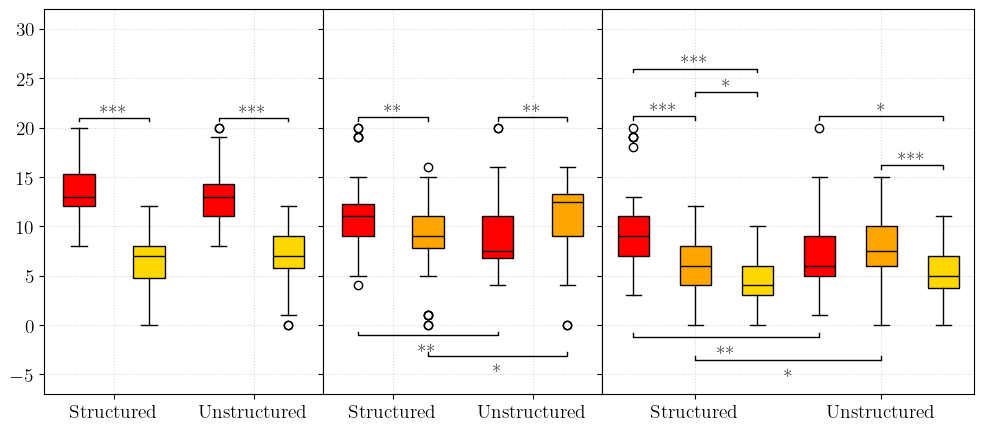

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), width_ratios=(0.3,0.3,0.4), sharey=True, gridspec_kw={'wspace': 0})

# ------------------------------------ HN ------------------------------------ #
choices_hn_counts_2x2 = extract_2x2_data(df_hn_counts, ['H','C'], var='count')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(choices_hn_counts_2x2[:,i], choices_hn_counts_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

ax = axes[0]
plot_2x2(choices_hn_counts_2x2, ax, 
         box_colors=['red','gold','red','gold'],
         significant_combinations=significant_combinations, half_line=False)
ax.grid(True, linestyle=':', alpha=0.5)

# ------------------------------------ HS ------------------------------------ #
choices_hs_counts_2x2 = extract_2x2_data(df_hs_counts, ['H','S'], var='count')

combinations = [(0,1),(2,3),(0,2),(1,3)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(choices_hs_counts_2x2[:,i], choices_hs_counts_2x2[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

print('\n')
for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

ax = axes[1]
plot_2x2(choices_hs_counts_2x2, ax, 
         box_colors=['red','orange','red','orange'],
         significant_combinations=significant_combinations, half_line=False)
ax.grid(True, linestyle=':', alpha=0.5)

# ----------------------------------- HSN ------------------------------------ #
choices_hsn_counts_2x3 = extract_2x3_data(df_hsn_counts, var='count')

combinations = [(0,1),(1,2),(0,2),(3,4),(4,5),(3,5),(0,3),(1,4),(2,5)]
p_vals = []
effect_sizes = []

for i, j in combinations:
    p, r = mann_whitney_effect_size(choices_hsn_counts_2x3[:,i], choices_hsn_counts_2x3[:,j])
    p_vals.append(p)
    effect_sizes.append(r)

p_vals_corrected = false_discovery(p_vals)
significant_combinations = [(*combinations[k], p_vals_corrected[k]) for k in range(len(p_vals_corrected)) if p_vals_corrected[k] <= 0.05]

print('\n')
for k in range(len(p_vals)):
    print(f'Comparisons {combinations[k]}, p-value: {p_vals[k]:.4f}, corrected p value: {p_vals_corrected[k]:.4f}, effect size: {effect_sizes[k]:.2f}')

ax = axes[2]
plot_2x3(choices_hsn_counts_2x3, ax, 
         box_colors=['red','orange','gold','red','orange','gold'],
         significant_combinations=significant_combinations, half_line=False)
ax.grid(True, linestyle=':', alpha=0.5)
ax.set_ylim(-7,32)


plt.show()

# Order effects
I consider the disaggregated data and test the difference between first and second half of the experiment

In [6]:
df_first_half_structured = df[df['first_block_strucutred'] == True]
df_second_half_structured = df[df['first_block_strucutred'] == False]


Text(0.5, 1.0, 'Hierarchical / Shortest / Neutral trials')

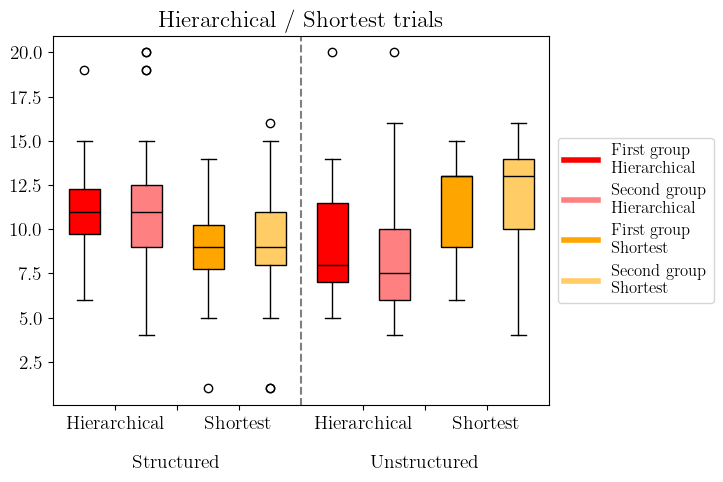

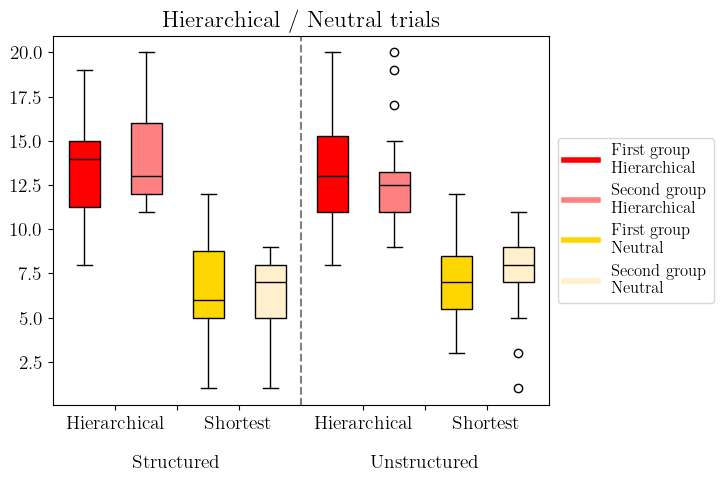

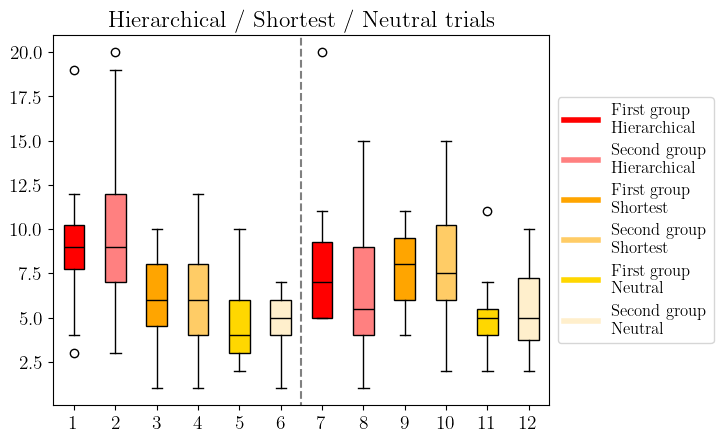

In [9]:
# Analisi estremamente fine per struttura ambiente, tipo di trial e scelta

# ------------------------------------ HS ------------------------------------ #
trial_type = 'SH'
box_data = []
p_values = []

red_light = [1, 0.5, 0.5]
orange_light = [1, 0.8, 0.4]

box_colors = ['red', red_light, 'orange', orange_light, 'red', red_light, 'orange', orange_light]

for structured in [True, False]:
    for first_choice in ['H','S']:
        half_counts = []

        for df_tmp in [df_first_half_structured, df_second_half_structured]:
            c = df_tmp[(df_tmp['type'] == trial_type) & (df_tmp['structured'] == structured) & (df_tmp['first_choice'] == first_choice)]['subject'].value_counts().to_numpy()
            
            if len(c) == 0: continue
            half_counts.append(c)
            box_data.append(c)

        if len(half_counts) < 2: continue
        p_val, r = mann_whitney_effect_size(half_counts[0], half_counts[1])
        p_values.append(p_val)
    
significant_combinations = [(i*2, i*2+1, p_values[i]) for i in range(len(box_data)//2) if p_values[i] <= 0.05]

plt.figure()
boxplot(box_data, box_colors=box_colors, significant_combinations=significant_combinations)

plt.xticks( [1.5, 2.5, 3.5, 5.5, 6.5, 7.5],['Hierarchical','\n\nStructured','Shortest', 'Hierarchical','\n\nUnstructured','Shortest'])
plt.axvline(4.5, -10, 10, linestyle='--', color=(0.5, 0.5, 0.5))

legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='First group\nHierarchical'),
    Line2D([0], [0], color=red_light, lw=4, label='Second group\nHierarchical'),
    Line2D([0], [0], color='orange', lw=4, label='First group\nShortest'),
    Line2D([0], [0], color=orange_light, lw=4, label='Second group\nShortest'),
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Hierarchical / Shortest trials')



# ------------------------------------ HN ------------------------------------ #
trial_type = 'CH'
box_data = []
p_values = []

red_light = [1, 0.5, 0.5]
gold_light = [1, 239/255.0, 204/255.0]

box_colors = ['red', red_light, 'gold', gold_light, 'red', red_light, 'gold', gold_light]

for structured in [True, False]:
    for first_choice in ['H','C']:
        half_counts = []

        for df_tmp in [df_first_half_structured, df_second_half_structured]:
            c = df_tmp[(df_tmp['type'] == trial_type) & (df_tmp['structured'] == structured) & (df_tmp['first_choice'] == first_choice)]['subject'].value_counts().to_numpy()
            
            if len(c) == 0: continue
            half_counts.append(c)
            box_data.append(c)

        if len(half_counts) < 2: continue
        p_val, r = mann_whitney_effect_size(half_counts[0], half_counts[1])
        p_values.append(p_val)
    
significant_combinations = [(i*2, i*2+1, p_values[i]) for i in range(len(box_data)//2) if p_values[i] <= 0.05]

plt.figure()
boxplot(box_data, box_colors=box_colors, significant_combinations=significant_combinations)

plt.xticks( [1.5, 2.5, 3.5, 5.5, 6.5, 7.5],['Hierarchical','\n\nStructured','Shortest', 'Hierarchical','\n\nUnstructured','Shortest'])
plt.axvline(4.5, -10, 10, linestyle='--', color=(0.5, 0.5, 0.5))

legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='First group\nHierarchical'),
    Line2D([0], [0], color=red_light, lw=4, label='Second group\nHierarchical'),
    Line2D([0], [0], color='gold', lw=4, label='First group\nNeutral'),
    Line2D([0], [0], color=gold_light, lw=4, label='Second group\nNeutral'),
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Hierarchical / Neutral trials')


# ------------------------------------ HSN ------------------------------------ #
trial_type = 'CSH'
box_data = []
p_values = []


box_colors = ['red', red_light, 'orange', orange_light, 'gold', gold_light, 'red', red_light, 'orange', orange_light, 'gold', gold_light]

for structured in [True, False]:
    for first_choice in ['H','S','C']:
        half_counts = []

        for df_tmp in [df_first_half_structured, df_second_half_structured]:
            c = df_tmp[(df_tmp['type'] == trial_type) & (df_tmp['structured'] == structured) & (df_tmp['first_choice'] == first_choice)]['subject'].value_counts().to_numpy()
            
            if len(c) == 0: continue
            half_counts.append(c)
            box_data.append(c)

        if len(half_counts) < 2: continue
        p_val, r = mann_whitney_effect_size(half_counts[0], half_counts[1])
        p_values.append(p_val)
    
significant_combinations = [(i*2, i*2+1, p_values[i]) for i in range(len(box_data)//2) if p_values[i] <= 0.05]

plt.figure()
boxplot(box_data, box_colors=box_colors, significant_combinations=significant_combinations)

plt.axvline(6.5, -10, 10, linestyle='--', color=(0.5, 0.5, 0.5))

legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='First group\nHierarchical'),
    Line2D([0], [0], color=red_light, lw=4, label='Second group\nHierarchical'),
    Line2D([0], [0], color='orange', lw=4, label='First group\nShortest'),
    Line2D([0], [0], color=orange_light, lw=4, label='Second group\nShortest'),
    Line2D([0], [0], color='gold', lw=4, label='First group\nNeutral'),
    Line2D([0], [0], color=gold_light, lw=4, label='Second group\nNeutral'),
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title('Hierarchical / Shortest / Neutral trials')

[np.float64(0.5692745356981694), np.float64(0.6563726992676718), np.float64(0.2972486394118147), np.float64(0.12491401401871503), np.float64(0.2344651720245594), np.float64(0.5818084847035759)]


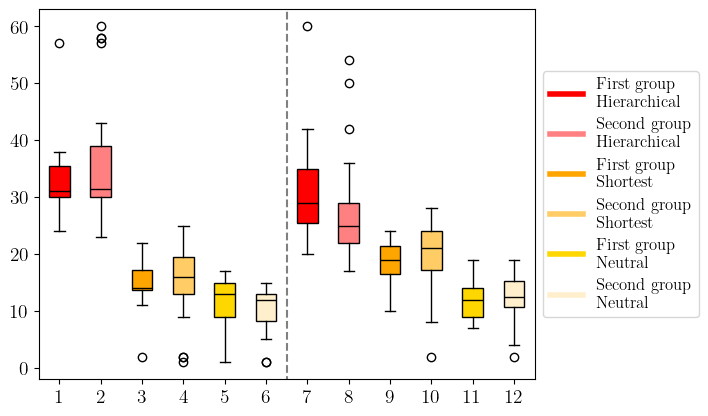

In [10]:
# I try to do the same but without dividing per trial type
box_data = []
p_values = []
box_colors = ['red', red_light, 'orange', orange_light, 'gold', gold_light, 'red', red_light, 'orange', orange_light, 'gold', gold_light]

for structured in [True, False]:
    for first_choice in ['H','S','C']:
        half_counts = []

        for df_tmp in [df_first_half_structured, df_second_half_structured]:
            c = df_tmp[(df_tmp['structured'] == structured) & (df_tmp['first_choice'] == first_choice)]['subject'].value_counts().to_numpy()
            
            if len(c) == 0: continue
            half_counts.append(c)
            box_data.append(c)

        if len(half_counts) < 2: continue
        p_val, r = mann_whitney_effect_size(half_counts[0], half_counts[1])
        p_values.append(p_val)
    
print(p_values)
significant_combinations = [(i*2, i*2+1, p_values[i]) for i in range(len(box_data)//2) if p_values[i] <= 0.05]

plt.figure()
boxplot(box_data, box_colors=box_colors, significant_combinations=significant_combinations)

plt.axvline(6.5, -10, 10, linestyle='--', color=(0.5, 0.5, 0.5))

legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='First group\nHierarchical'),
    Line2D([0], [0], color=red_light, lw=4, label='Second group\nHierarchical'),
    Line2D([0], [0], color='orange', lw=4, label='First group\nShortest'),
    Line2D([0], [0], color=orange_light, lw=4, label='Second group\nShortest'),
    Line2D([0], [0], color='gold', lw=4, label='First group\nNeutral'),
    Line2D([0], [0], color=gold_light, lw=4, label='Second group\nNeutral'),
]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


# Full trial time analysis

0 1 -0.36124999999999996
1 2 -1.0
0 2 -1.0
3 4 -0.54625
4 5 -1.0
3 5 -1.0
0 3 -0.29374999999999996
1 4 -0.47750000000000004
2 5 -0.11250000000000004


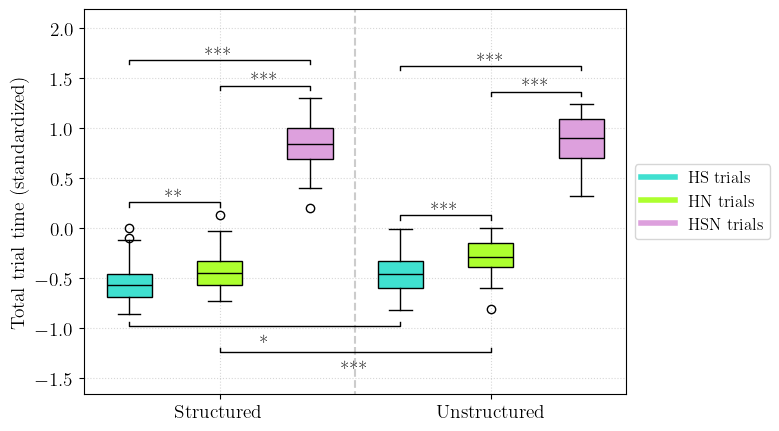

In [11]:
df_times_standardized = df.copy()

# Correct for the fact that in HSN trials there are more goals
# df_times_standardized.loc[df_times_standardized['type'] == 'SH', 'trial_time'] /= 2
# df_times_standardized.loc[df_times_standardized['type'] == 'CH', 'trial_time'] /= 2
# df_times_standardized.loc[df_times_standardized['type'] == 'CSH', 'trial_time'] /= 3

# Standardize per subject, to remove individual variability like in the main analysis
df_times_standardized = standardize_df_data(df_times_standardized, ['subject'],'trial_time')

times_data = []
for structured in [True, False]:
    for trial_type in ['SH','CH','CSH']:
        times_cond = df_times_standardized[(df_times_standardized['type'] == trial_type) & (df_times_standardized['structured'] == structured)].groupby('subject')['trial_time'].mean().to_numpy()
        times_data.append(times_cond)

combinations = [(0,1),(1,2),(0,2),(3,4),(4,5),(3,5),(0,3),(1,4),(2,5)]
p_values = []
effect_sizes = []

for (i, j) in combinations:
    p, r = mann_whitney_effect_size(times_data[i], times_data[j])
    p_values.append(p)
    effect_sizes.append(r)
    print(i, j, r)

p_values = false_discovery(p_values)

significant_combinations = [(*combinations[i], p_values[i]) for i in range(len(combinations)) if p_values[i] <= 0.05]
line_positions = {(0,1):'up',(1,2):'up',(0,2):'up',
                  (3,4):'up',(4,5):'up',(3,5):'up',
                  (0,3):'down',(1,4):'down',(2,5):'down'}


box_colors = ['turquoise','greenyellow','plum']*2

plt.figure(figsize=(7,5))
plt.axvline(3.5, -10, 10, linestyle='--', color=(0.8, 0.8, 0.8))
boxplot(times_data, significant_combinations=significant_combinations, box_colors=box_colors, significance_lines_position=line_positions, sep_multiplier=1.2)

legend_elements = [
    Line2D([0], [0], color=box_colors[0], lw=4, label='HS trials'),
    Line2D([0], [0], color=box_colors[1], lw=4, label='HN trials'),
    Line2D([0], [0], color=box_colors[2], lw=4, label='HSN trials'),
]

plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xticks( [2, 5],['Structured','Unstructured'])
plt.ylabel('Total trial time (standardized)')
plt.ylim(plt.ylim()[0]*1.2, plt.ylim()[1]*1.2)

plt.savefig('TrialTimes.pdf', bbox_inches='tight')